In [ ]:
# • Assess the performance of machine learning models
# • Diagnose the common problems of machine learning algorithms
# • Fine-tune machine learning models
# • Evaluate predictive models using different performance metrics

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [3]:
# load the dataset
df = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases'
 '/breast-cancer-wisconsin/wdbc.data',
 header=None
)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X=df.loc[:,2:].values
y=df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_ # array(['B', 'M'], dtype=object)
le.transform(['M', 'B'])



array([1, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# after splitting the dataset into test and train now we make pipeline for standardization, PCA and logistic regression

pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
test_accuracy = pipe_lr.score(X_test, y_test)
print('Test Accuracy: %.3f' % test_accuracy)

Test Accuracy: 0.956
Test Accuracy: 0.956


In [17]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print(f'Fold: {k+1:02d}, '
    f'Class distr.: {np.bincount(y_train[train])}, '
    f'Acc.: {score:.3f}')


print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
    

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956
CV accuracy: 0.950 +/- 0.014


In [19]:
# sklearn also provides a convenient function for cross-validation called cross_val_score that allows us to evaluate a model using k-fold cross-validation with a single function call.


scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


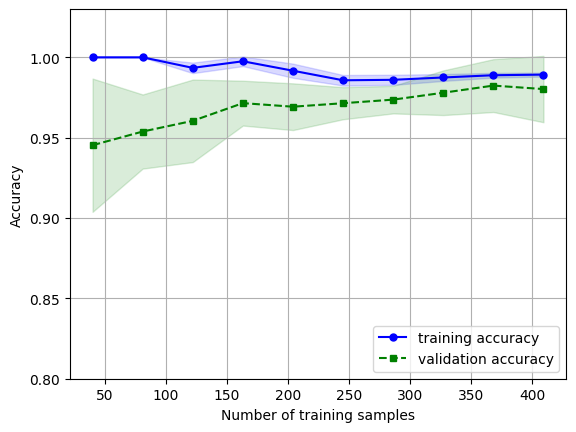

In [23]:
# Debugging algorithms with learning and validation curves
# Learning curves are plots of the model's training and validation accuracies as a function of the training set size. To generate the learning curves, 
# we will use the learning_curve function from scikit-learn's model_selection module
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1,max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)

test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.show()

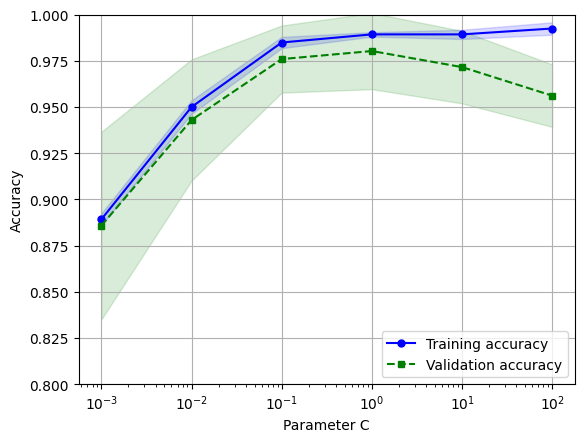

In [24]:
# Validation curves are similar to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, 
# we vary the values of the model parameters, for example, the inverse regularization parameter C in logistic regression.


from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
            estimator=pipe_lr,
            X=X_train,
            y=y_train,
            param_name='logisticregression__C',
            param_range=param_range,
            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(param_range, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(param_range,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [26]:
# Grid search is a powerful method for searching through different combinations of hyperparameters.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},{'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Test accuracy: 0.974


In [33]:
# Randomized search is an alternative to grid search that allows us to draw random combinations of hyperparameters from sampling distributions with a specified budget.
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
from scipy.stats import uniform
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
# distributions = dict(svc__C=uniform(loc=0, scale=4),svc__kernel=['linear','rbf'],svc__gamma=uniform(loc=0, scale=4))
param_grid = [{'svc__C': param_range,
 'svc__kernel': ['linear']},
 {'svc__C': param_range,
 'svc__gamma': param_range,
 'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,param_distributions=param_grid,n_iter=20,scoring='accuracy',cv=10,n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)
clf = rs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


0.9802898550724638
{'svc__C': np.float64(70.95133712376457), 'svc__gamma': np.float64(0.042792754112957944), 'svc__kernel': 'rbf'}
Test accuracy: 0.947


In [36]:
# HalvingRandomSearchCV is a new feature in scikit-learn 0.24 that allows us to perform an iterative randomized search with a decreasing budget.
# HalvingGridSearchCV is a new feature in scikit-learn 0.24 that allows us to perform an iterative grid search with a decreasing grid size.
#  Successive halving, given a large set of candidate configurations, successively throws out unpromising hyperparameter configurations until only one configuration remains

# The algorithm proceeds as follows:
# 1. Draw a large set of candidate configurations via random sampling
# 2. Train the models with limited resources, for example, a small subset of the training data (as 
# opposed to using the entire training set)
# 3. Discard the bottom 50 percent based on predictive performance
# 4. Go back to step 2 with an increased amount of available resources

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
hs = HalvingRandomSearchCV(estimator=pipe_svc,param_distributions=param_grid,
                           n_candidates='exhaust', #sample the number of hyperparameter configurations such that the maximum number of resources (here: training examples) are used in the last round.
                           resource='n_samples', #  setting specifies that we consider the training set size as the resource we vary between rounds
                           factor=1.5, # the factor by which we decrease the resource between iterations: =1.5 means that only 100%/1.5 ≈ 66% o
                           random_state=1,n_jobs=-1)
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)
clf = hs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


0.9617647058823529
{'svc__C': np.float64(4.934834261073333), 'svc__kernel': 'linear'}
Test accuracy: 0.982


In [39]:
# Algorithm selection with nested cross-validation
# Nested cross-validation is a technique for model selection that can be used to assess how well a model generalizes to an independent dataset.
# The idea behind nested cross-validation is to use multiple outer loops and inner loops to evaluate the model performance.
# The outer loop is used to assess the model performance, and the inner loop is used to select the best model using k-fold cross-validation.
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
        'svc__kernel': ['linear']},
        {'svc__C': param_range,
        'svc__gamma': param_range,
        'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
        param_grid=param_grid,
        scoring='accuracy',
        cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy SVM: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# The nested cross-validation approach is computationally expensive, but it provides a more reliable estimate of the model's performance compared to a single split into training and test sets.
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring='accuracy',
    cv=2
    )
scores = cross_val_score(gs, X_train, y_train,
scoring='accuracy', cv=5)
print(f'CV accuracy Decision Tree: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy SVM: 0.974 +/- 0.015
CV accuracy Decision Tree: 0.934 +/- 0.016


In [40]:
# Confusion matrix: a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


[[71  1]
 [ 2 40]]


In [ ]:
# Optimizing the precision and recall of a classification model
# Precision is the ratio of correctly predicted positive observations to the total predicted positives, 
# Recall is the ratio of correctly predicted positive observations to the all observations in actual class.




Sure! Let’s break down precision and recall into simpler terms:

### **Precision:**

- **What It Is:** Precision measures how many of the things your model labeled as "positive" are actually positive.
- **Simple Example:** Imagine you have a basket of fruits, and you’re picking out apples. If you picked 10 apples and 8 of them were actually apples (and 2 were oranges), your precision is high because most of what you picked was correct.
- **Formula:** \(\text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of True Positives + Number of False Positives}}\)

### **Recall:**

- **What It Is:** Recall measures how many of the actual "positive" things were correctly identified by your model.
- **Simple Example:** If there were 12 apples in the basket and you managed to pick 8 of them, your recall is how good you were at finding all the apples in the basket.
- **Formula:** \(\text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of True Positives + Number of False Negatives}}\)

### **In Summary:**

- **Precision:** Out of everything you said was positive, how many were actually positive?
- **Recall:** Out of everything that was actually positive, how many did you find?

In essence, precision is about the quality of your positive predictions, while recall is about the quantity of actual positives you’ve managed to capture.


The Receiver Operating Characteristic (ROC) curve is a fundamental tool for assessing the performance of classification models. Here’s a breakdown of its key aspects:

### 1. **ROC Curve:**

- **Definition:** The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classification model as its discrimination threshold is varied.
- **Axes:**
  - **X-Axis:** False Positive Rate (FPR) — the proportion of actual negatives that are incorrectly classified as positives.
  - **Y-Axis:** True Positive Rate (TPR) — the proportion of actual positives that are correctly classified as positives.
- **Curve Interpretation:** The curve plots the TPR against the FPR at various threshold settings. A model with a higher TPR and a lower FPR will be closer to the top-left corner of the plot.

### 2. **Area Under the Curve (AUC):**

- **Definition:** The AUC is the area under the ROC curve.
- **Interpretation:**
  - **AUC = 1:** Perfect model — the model correctly classifies all positive and negative samples.
  - **AUC = 0.5:** No discrimination ability — the model performs no better than random guessing.
  - **0.5 < AUC < 1:** The model has some level of discrimination capability, with higher values indicating better performance.

### 3. **Usage:**

- **Model Comparison:** ROC and AUC are useful for comparing the performance of different models or classifiers. The model with the higher AUC is generally preferred.
- **Threshold Selection:** The ROC curve helps in choosing the optimal threshold for classification based on the desired trade-off between TPR and FPR.

### 4. **Advantages:**

- **Threshold-Independent:** It evaluates the model's performance across all possible thresholds, providing a comprehensive view.
- **Class Imbalance:** It is useful in scenarios where the classes are imbalanced, as it evaluates performance across different threshold settings.

Overall, the ROC curve and AUC are essential for understanding and selecting classification models, especially when dealing with binary classification problems.


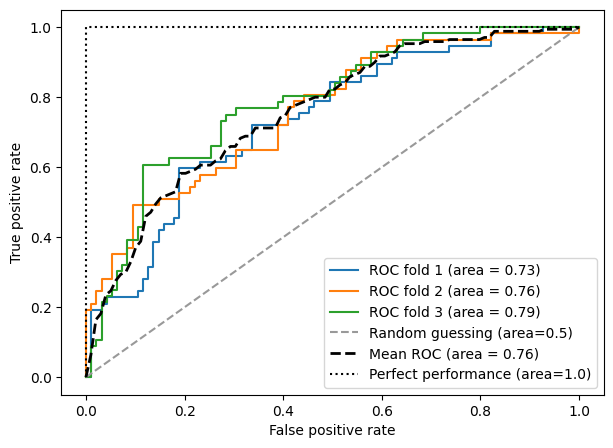

In [42]:
# Plotting a receiver operating characteristic
# 
from sklearn.metrics import roc_curve, auc
from numpy import interp
pipe_lr=make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty="l2",random_state=1,solver="lbfgs",C=100.0)
)
X_train2=X_train[:,[4,14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(
    X_train2[train],
    y_train[train]
    ).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
    probas[:, 1],
    pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
        tpr,
        label=f'ROC fold {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],
    linestyle='--',
    color=(0.6, 0.6, 0.6),
    label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],[0, 1, 1],
    linestyle=':',
    color='black',
    label='Perfect performance (area=1.0)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()


For multiclass classification problems, several scoring metrics can be used to evaluate the performance of models. Here are some of the most common ones:

### 1. **Accuracy:**

- **Definition:** The proportion of correctly predicted instances out of the total instances.
- **Formula:** \(\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}\)
- **Use Case:** Simple and intuitive, but may not be informative if the classes are imbalanced.

### 2. **Precision, Recall, and F1 Score (Per-Class Metrics):**

- **Precision (Per-Class):** The proportion of true positive predictions for a class out of all predictions made for that class.
  - **Formula:** \(\text{Precision}\_i = \frac{TP_i}{TP_i + FP_i}\)
- **Recall (Per-Class):** The proportion of true positive predictions for a class out of all actual instances of that class.
  - **Formula:** \(\text{Recall}\_i = \frac{TP_i}{TP_i + FN_i}\)
- **F1 Score (Per-Class):** The harmonic mean of precision and recall.
  - **Formula:** \(\text{F1 Score}\_i = 2 \times \frac{\text{Precision}\_i \times \text{Recall}\_i}{\text{Precision}\_i + \text{Recall}\_i}\)

### 3. **Macro-Averaged Metrics:**

- **Macro-Averaged Precision:** The average of precision scores across all classes.
- **Macro-Averaged Recall:** The average of recall scores across all classes.
- **Macro-Averaged F1 Score:** The average of F1 scores across all classes.
- **Use Case:** Treats all classes equally and is useful when you want to evaluate overall performance without considering class imbalance.

### 4. **Micro-Averaged Metrics:**

- **Micro-Averaged Precision:** Aggregates contributions of all classes to compute the average metric.
- **Micro-Averaged Recall:** Same as micro-averaged precision, aggregating contributions from all classes.
- **Micro-Averaged F1 Score:** Same as micro-averaged precision and recall, but for F1 Score.
- **Use Case:** Useful when classes are imbalanced, as it takes into account the contribution of each instance rather than each class.

### 5. **Weighted-Averaged Metrics:**

- **Weighted-Averaged Precision:** Takes into account the support (number of true instances) for each class and computes the average precision weighted by support.
- **Weighted-Averaged Recall:** Similar to weighted-precision, but for recall.
- **Weighted-Averaged F1 Score:** Similar to weighted-precision and recall, but for F1 Score.
- **Use Case:** Useful when you want to account for class imbalance while evaluating overall performance.

These metrics offer various perspectives on model performance and can be used in combination to get a comprehensive understanding of how well a multiclass classification model is performing.


In [44]:
# Dealing with class imbalance

X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 10

np.float64(8.992443324937028)